In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia2_RFE.csv')
data.head()

,Age_of_Participants,Gender,Level_of_Education,Occupational_Status,Economic_Class,Frequency_of_Blood_Transfusion,Comorbidities_Status,Medical_Expense,General_Health,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,0,6,1,1,0,3,180000,50,75,100,90.0,65,92,100.0,50.0,82.3,80.1,0
1,18,1,2,1,1,1,3,60000,75,100,100,100.0,90,92,100.0,50.0,94.0,89.6,0
2,13,0,2,1,1,1,3,96000,65,100,100,70.0,100,100,100.0,75.0,90.0,91.5,0
3,14,0,2,1,1,1,3,120000,60,100,100,100.0,90,92,100.0,52.5,94.0,89.9,0
4,13,1,5,1,1,0,3,150000,40,65,100,55.0,70,92,100.0,42.5,72.3,73.9,0


In [4]:
data

,Age_of_Participants,Gender,Level_of_Education,Occupational_Status,Economic_Class,Frequency_of_Blood_Transfusion,Comorbidities_Status,Medical_Expense,General_Health,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,0,6,1,1,0,3,180000,50,75,100,90.0,65,92,100.0,50.0,82.3,80.1,0
1,18,1,2,1,1,1,3,60000,75,100,100,100.0,90,92,100.0,50.0,94.0,89.6,0
2,13,0,2,1,1,1,3,96000,65,100,100,70.0,100,100,100.0,75.0,90.0,91.5,0
3,14,0,2,1,1,1,3,120000,60,100,100,100.0,90,92,100.0,52.5,94.0,89.9,0
4,13,1,5,1,1,0,3,150000,40,65,100,55.0,70,92,100.0,42.5,72.3,73.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,12,0,1,1,1,1,3,48000,65,65,0,67.5,35,48,100.0,20.0,50.2,50.4,0
352,12,1,5,1,2,1,3,96000,65,65,0,35.0,40,64,100.0,20.0,46.3,50.2,0
353,13,0,2,1,1,1,3,18000,60,100,100,77.5,45,68,100.0,20.0,63.5,61.4,0
354,17,0,6,1,1,0,3,48000,40,35,0,45.0,30,56,100.0,20.0,43.7,46.8,1


In [5]:
# Split features and target
X = data.drop('Mental_Health_Status', axis=1)
y = data['Mental_Health_Status']

# Display the encoded dataset
print(X)
print(y)

     Age_of_Participants  Gender  Level_of_Education  Occupational_Status  \
0                     15       0                   6                    1   
1                     18       1                   2                    1   
2                     13       0                   2                    1   
3                     14       0                   2                    1   
4                     13       1                   5                    1   
..                   ...     ...                 ...                  ...   
351                   12       0                   1                    1   
352                   12       1                   5                    1   
353                   13       0                   2                    1   
354                   17       0                   6                    1   
355                   12       0                   5                    1   

     Economic_Class  Frequency_of_Blood_Transfusion  Comorbidities_Status  

In [6]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Accuracy : 0.9305555555555556
Precision : 0.9411764705882353
Recall : 0.8
F1-Score : 0.8648648648648649

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        52
           1       0.94      0.80      0.86        20

    accuracy                           0.93        72
   macro avg       0.93      0.89      0.91        72
weighted avg       0.93      0.93      0.93        72



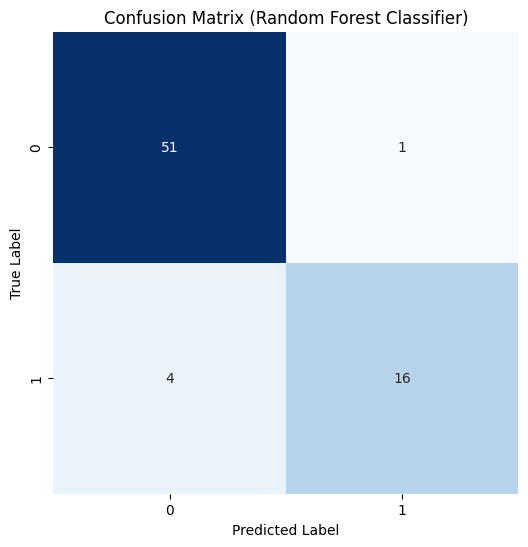

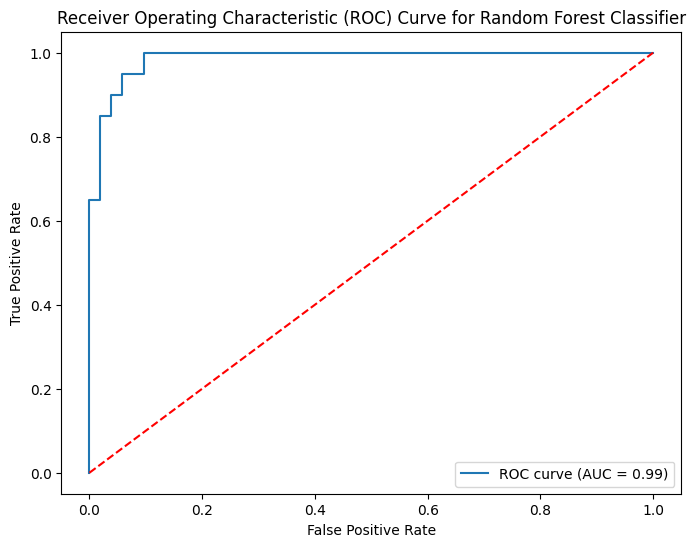

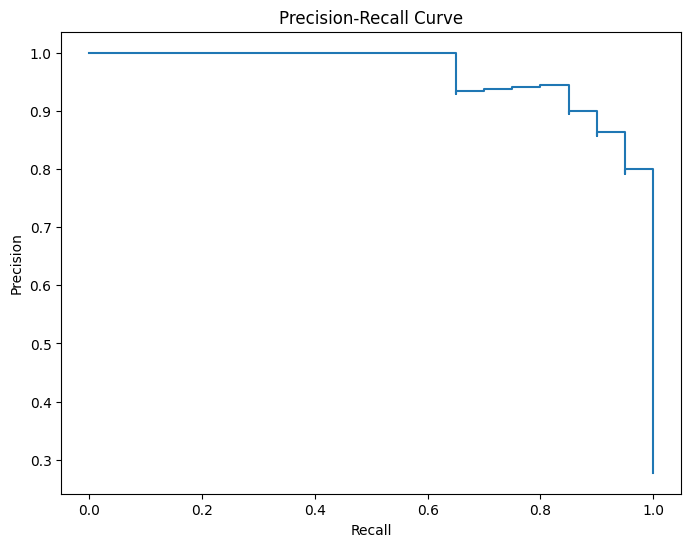

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy: 0.9305555555555556
Precision: 0.8947368421052632
Recall: 0.85
F1-Score: 0.8717948717948718

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.89      0.85      0.87        20

    accuracy                           0.93        72
   macro avg       0.92      0.91      0.91        72
weighted avg       0.93      0.93      0.93        72



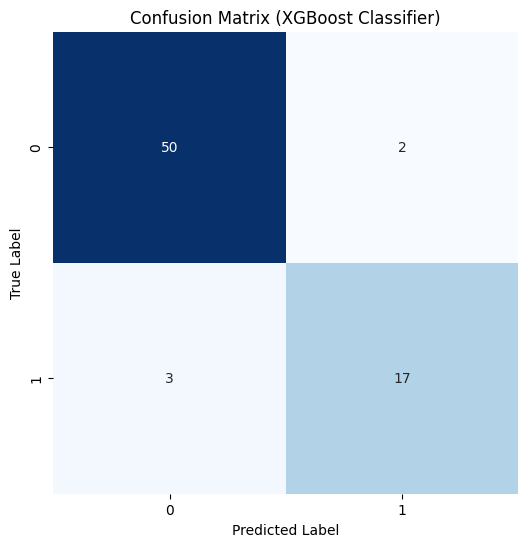

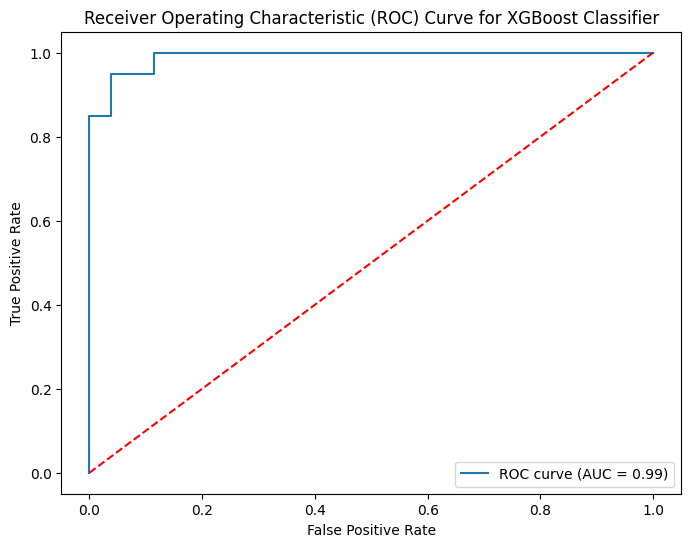

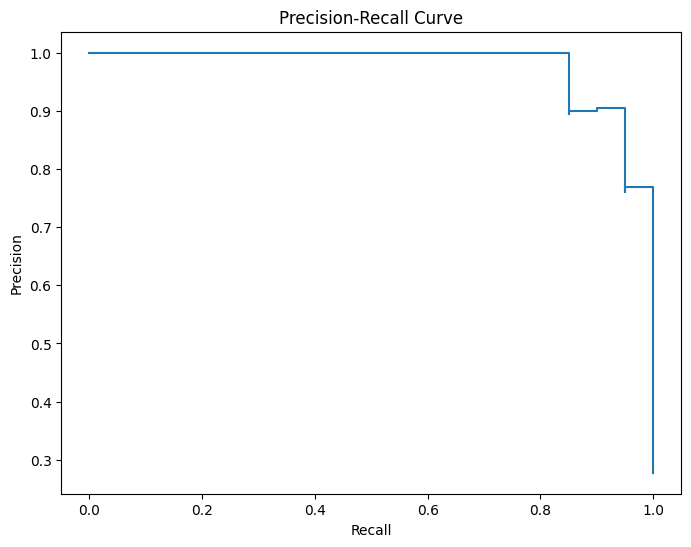

In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy: 0.7222222222222222
Precision: 0.5
Recall: 0.25
F1-Score: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82        52
           1       0.50      0.25      0.33        20

    accuracy                           0.72        72
   macro avg       0.63      0.58      0.58        72
weighted avg       0.69      0.72      0.69        72



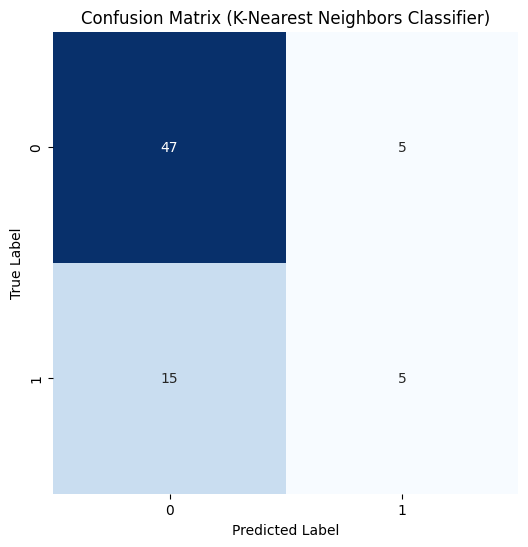

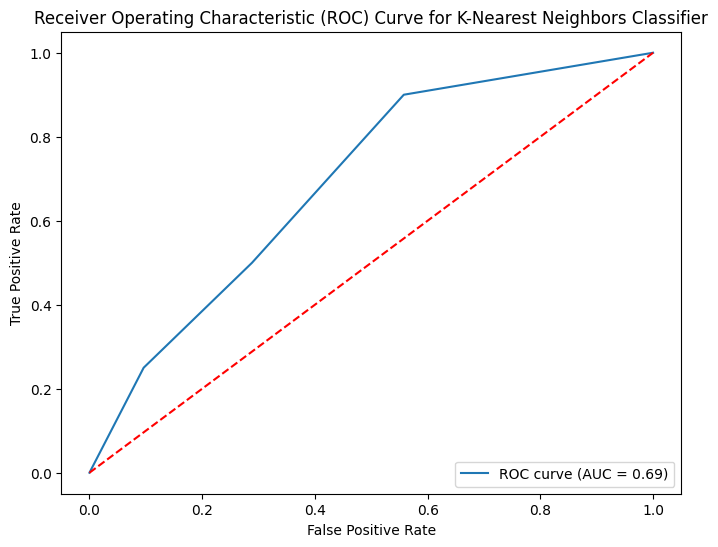

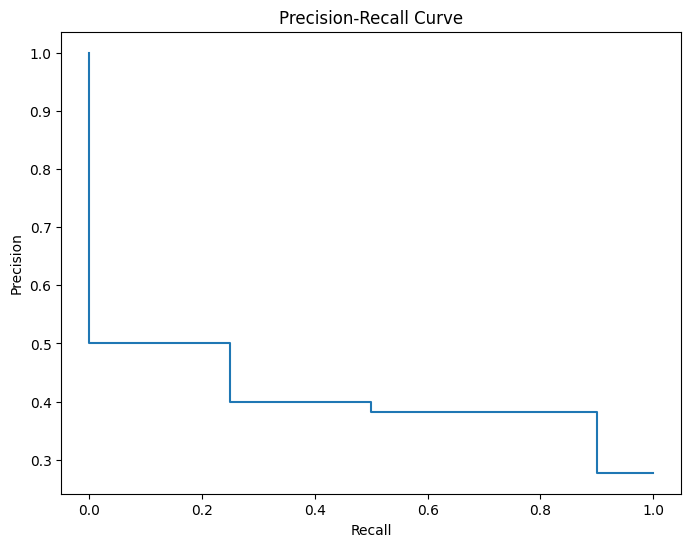

In [9]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (K-Nearest Neighbors Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = knn_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for K-Nearest Neighbors Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy: 0.7361111111111112
Precision: 1.0
Recall: 0.05
F1-Score: 0.09523809523809523

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        52
           1       1.00      0.05      0.10        20

    accuracy                           0.74        72
   macro avg       0.87      0.53      0.47        72
weighted avg       0.81      0.74      0.64        72



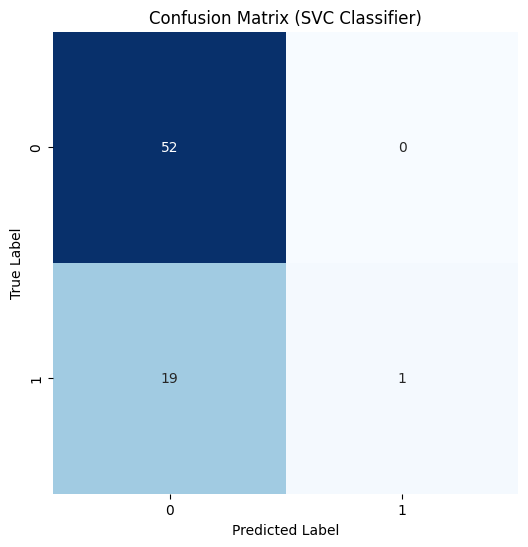

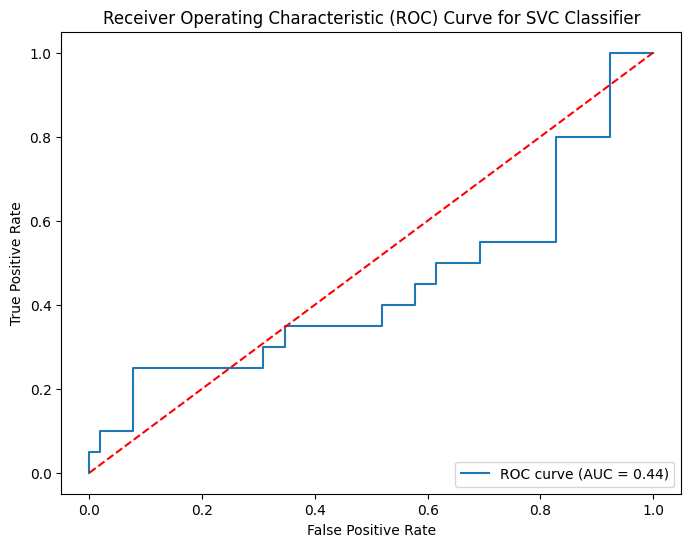

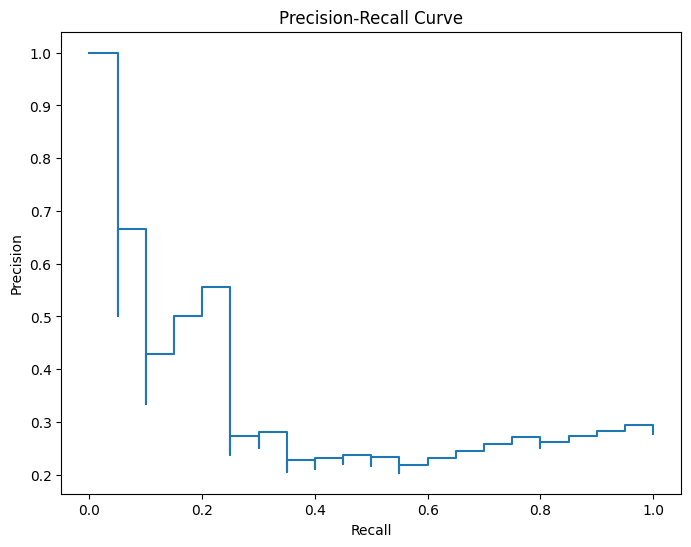

In [10]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the Support Vector Classifier
svc_classifier = SVC(probability=True, random_state=42)  # Set probability=True to enable predict_proba

# Train the model
svc_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = svc_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVC Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = svc_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy: 0.9583333333333334
Precision: 1.0
Recall: 0.85
F1-Score: 0.918918918918919

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.85      0.92        20

    accuracy                           0.96        72
   macro avg       0.97      0.93      0.95        72
weighted avg       0.96      0.96      0.96        72



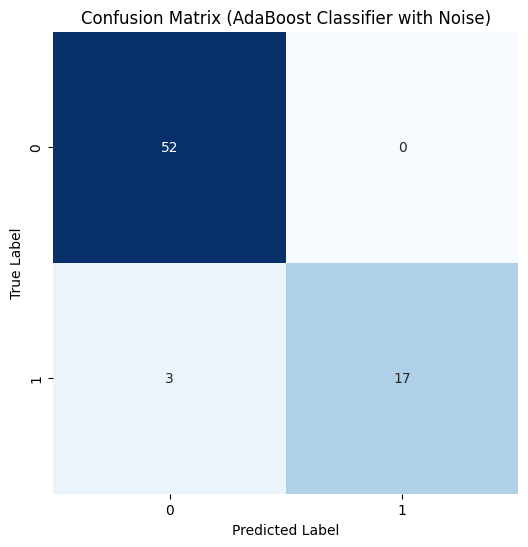

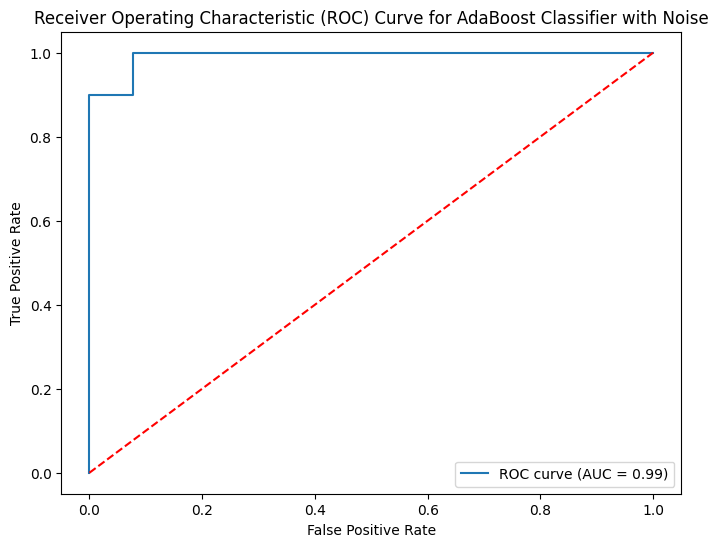

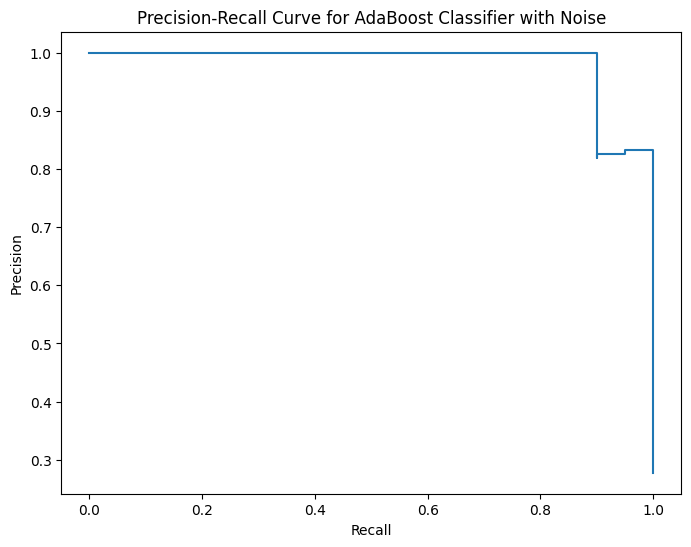

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (AdaBoost Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = adaboost_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [17]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=8bac3544544ff9b2a7d17c0463d10f871c1502ef5e1b7ce18a03174e11f4174f
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


Stopping search: maximum iterations reached --> 20

Accuracy: 0.9722222222222222
Precision: 1.0
Recall: 0.9
F1-Score: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.90      0.95        20

    accuracy                           0.97        72
   macro avg       0.98      0.95      0.96        72
weighted avg       0.97      0.97      0.97        72



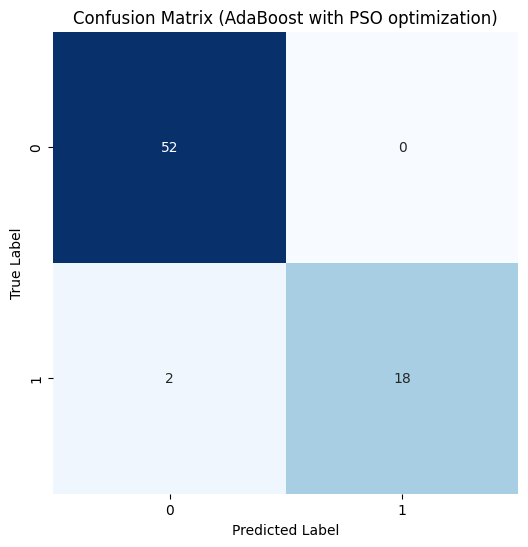

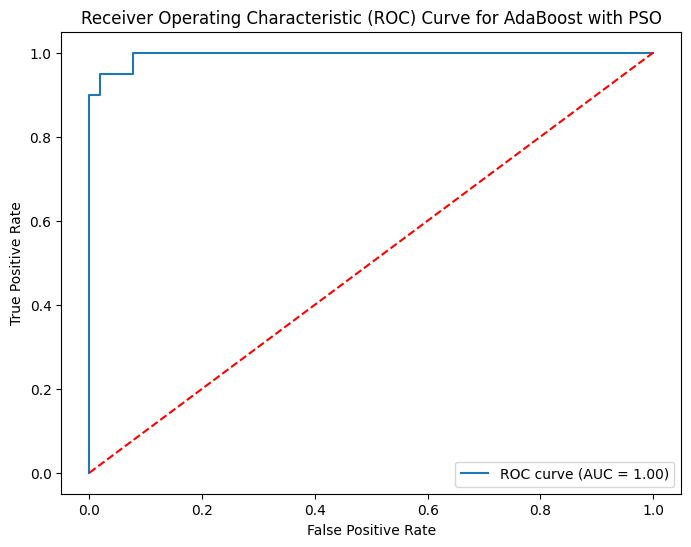

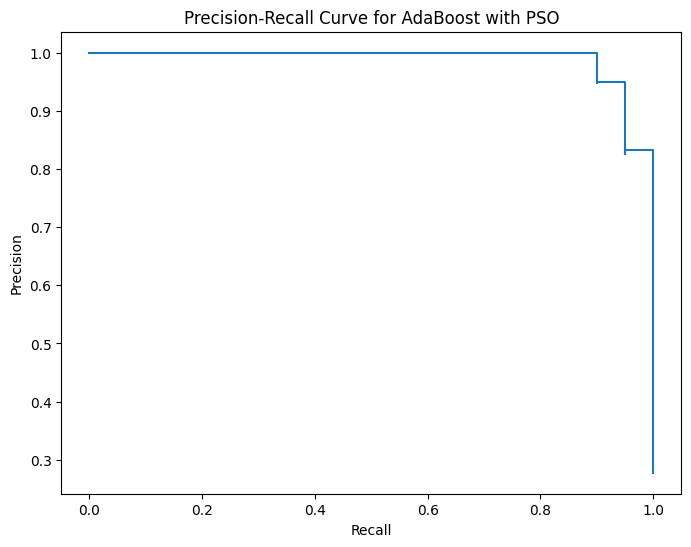

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Define the objective function for PSO to minimize the negative accuracy (maximize accuracy)
def objective_function(params):
    n_estimators = int(params[0])  # Number of estimators
    learning_rate = params[1]      # Learning rate

    # Initialize the AdaBoost classifier with the given parameters
    adaboost_classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

    # Train the model
    adaboost_classifier.fit(X_train, y_train)

    # Evaluate on test set
    y_test_pred = adaboost_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    # Return the negative of the accuracy because PSO minimizes the objective function
    return -accuracy

# Set the bounds for the parameters (n_estimators, learning_rate)
lb = [10, 0.01]  # Lower bounds for [n_estimators, learning_rate]
ub = [200, 1.0]  # Upper bounds for [n_estimators, learning_rate]

# Run PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Extract the best parameters from the result
best_n_estimators = int(best_params[0])
best_learning_rate = best_params[1]

# Train the AdaBoost classifier with the optimized hyperparameters
adaboost_classifier = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (AdaBoost with PSO optimization)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = adaboost_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost with PSO')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for AdaBoost with PSO')
plt.show()


[LightGBM] [Info] Number of positive: 70, number of negative: 157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 227, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.308370 -> initscore=-0.807751
[LightGBM] [Info] Start training from score -0.807751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


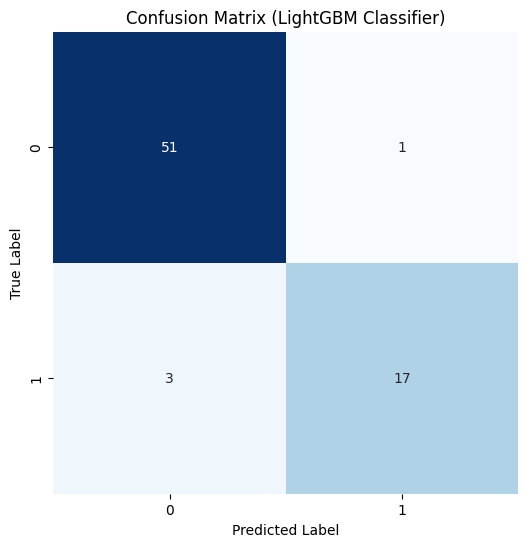

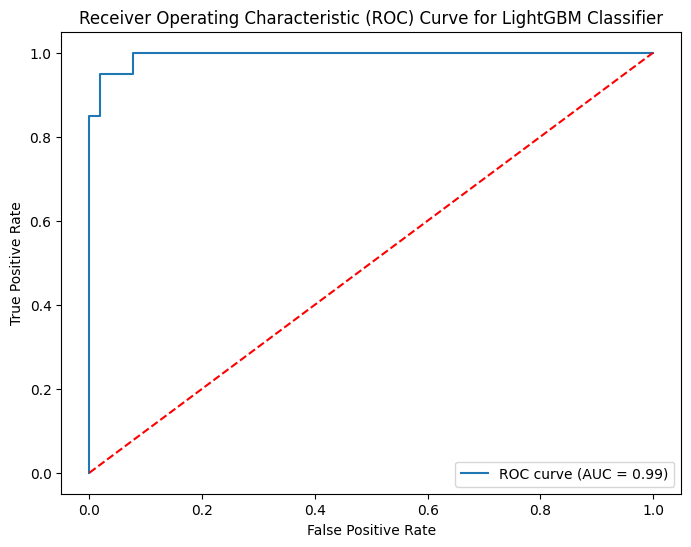

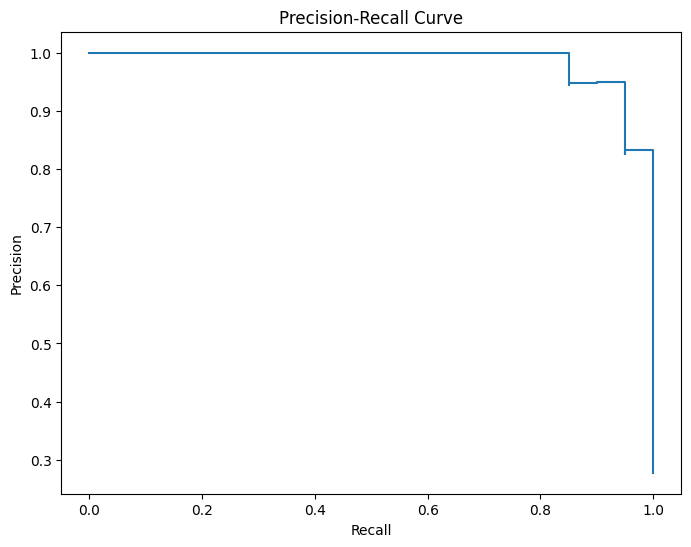

In [22]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Initialize the LightGBM classifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Train the model
lgbm_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = lgbm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (LightGBM Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = lgbm_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

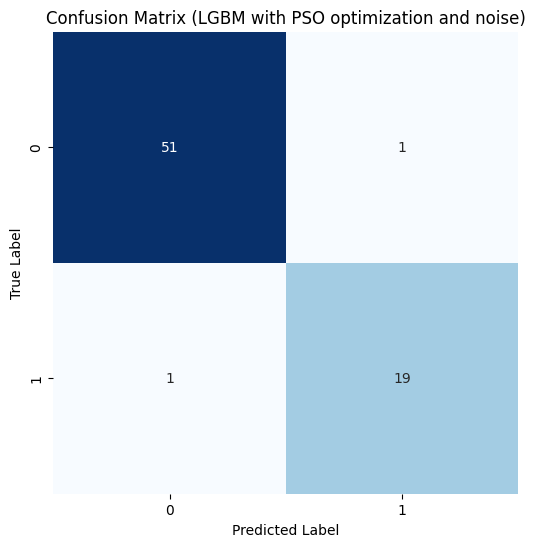

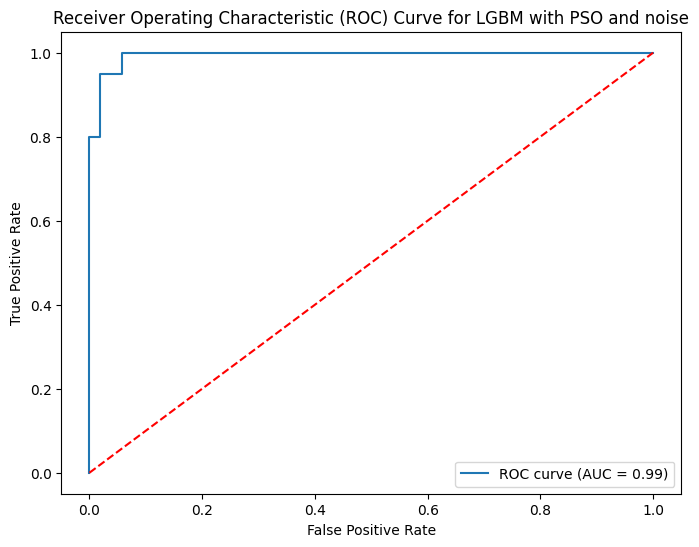

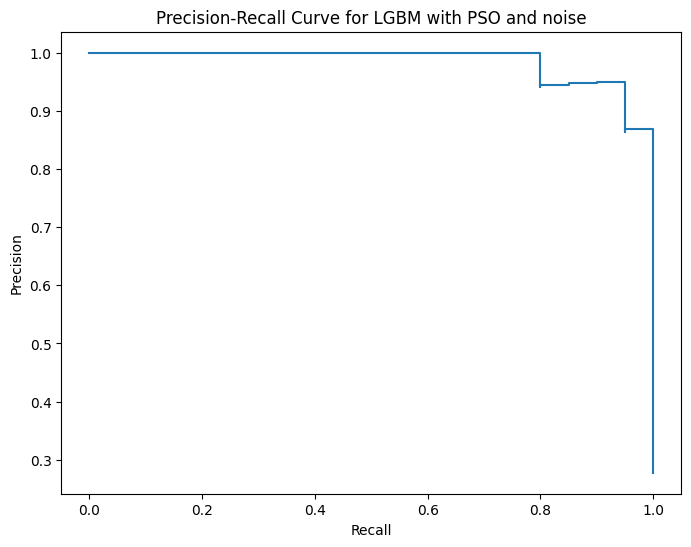

In [24]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Define the objective function for PSO to minimize the negative accuracy (maximize accuracy)
def objective_function(params):
    n_estimators = int(params[0])  # Number of estimators
    learning_rate = params[1]      # Learning rate
    max_depth = int(params[2])     # Maximum depth of trees

    # Initialize the LGBM classifier with the given parameters
    lgbm_classifier = LGBMClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )

    # Train the model
    lgbm_classifier.fit(X_train, y_train)

    # Evaluate on test set
    y_test_pred = lgbm_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    # Return the negative of the accuracy because PSO minimizes the objective function
    return -accuracy

# Set the bounds for the parameters (n_estimators, learning_rate, max_depth)
lb = [10, 0.01, 3]  # Lower bounds for [n_estimators, learning_rate, max_depth]
ub = [200, 1.0, 15]  # Upper bounds for [n_estimators, learning_rate, max_depth]

# Run PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Extract the best parameters from the result
best_n_estimators = int(best_params[0])
best_learning_rate = best_params[1]
best_max_depth = int(best_params[2])

# Train the LGBM classifier with the optimized hyperparameters
lgbm_classifier = LGBMClassifier(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth,
    random_state=42
)
lgbm_classifier.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = lgbm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (LGBM with PSO optimization)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = lgbm_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LGBM with PSO')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LGBM with PSO')
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6805 - loss: 4025.9253 - val_accuracy: 0.6806 - val_loss: 410.2130
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4595 - loss: 514.9622 - val_accuracy: 0.6806 - val_loss: 254.9835
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6825 - loss: 412.1402 - val_accuracy: 0.6806 - val_loss: 253.8702
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4876 - loss: 196.6664 - val_accuracy: 0.6667 - val_loss: 186.3298
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5320 - loss: 122.8844 - val_accuracy: 0.6806 - val_loss: 190.8375
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6834 - loss: 169.0317 - val_accuracy: 0.2778 - val_loss: 59.1205
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5019 - loss: 57.6530 - val_accuracy: 0.6806 - val_loss: 152.6773
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6471 - loss: 115.4995 - val_accuracy: 0

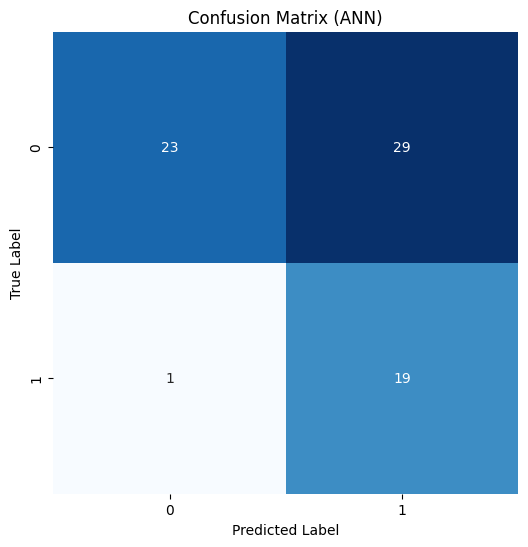

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


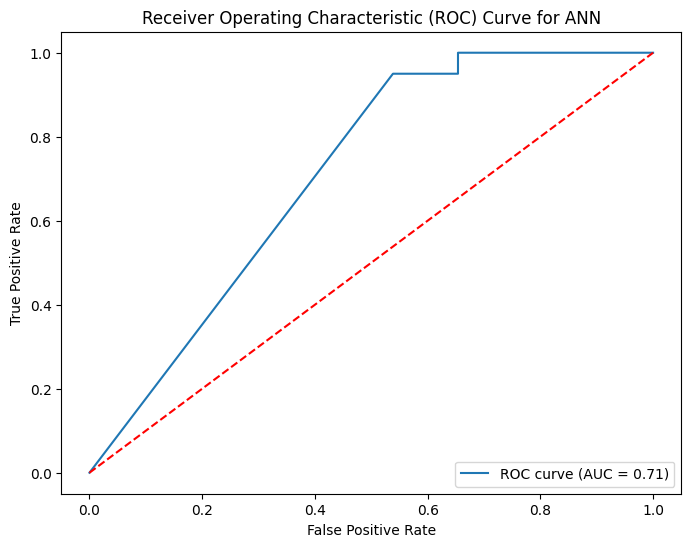

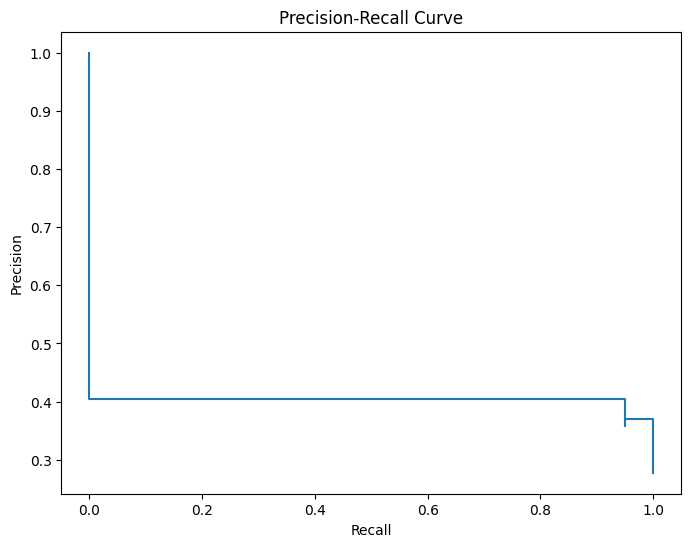

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on test set
y_test_probs = model.predict(X_test).flatten()
y_test_pred = (y_test_probs > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (ANN)')
plt.show()

# Calculate ROC curve and AUC for binary classification
y_pred_probs = model.predict(X_test).flatten()
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5256 - loss: 1131.0261 - val_accuracy: 0.2778 - val_loss: 884.7463
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3525 - loss: 1036.4739 - val_accuracy: 0.7222 - val_loss: 1035.0204
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7071 - loss: 950.8603 - val_accuracy: 0.2778 - val_loss: 671.5157
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3084 - loss: 971.0153 - val_accuracy: 0.7222 - val_loss: 751.3453
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7233 - loss: 996.4427 - val_accuracy: 0.7222 - val_loss: 924.7729
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6286 - loss: 611.3586 - val_accuracy: 0.3056 - val_loss: 581.3792
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4120 - loss: 475.6344 - val_accuracy: 0.7222 - val_loss: 299.3800
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6306 - loss: 188.5305 - val_accurac

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

Accuracy: 0.8055555555555556
Precision: 0.875
Recall: 0.35
F1-Score: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88        52
           1       0.88      0.35      0.50        20

    accuracy                           0.81        72
   macro avg       0.84      0.67      0.69        72
weighted avg       0.82      0.81      0.77        72



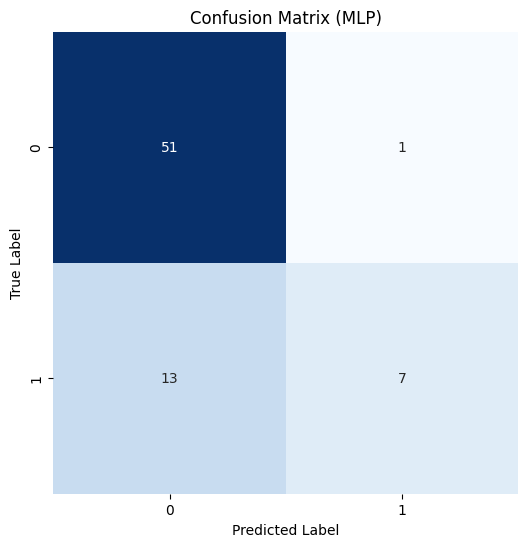

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


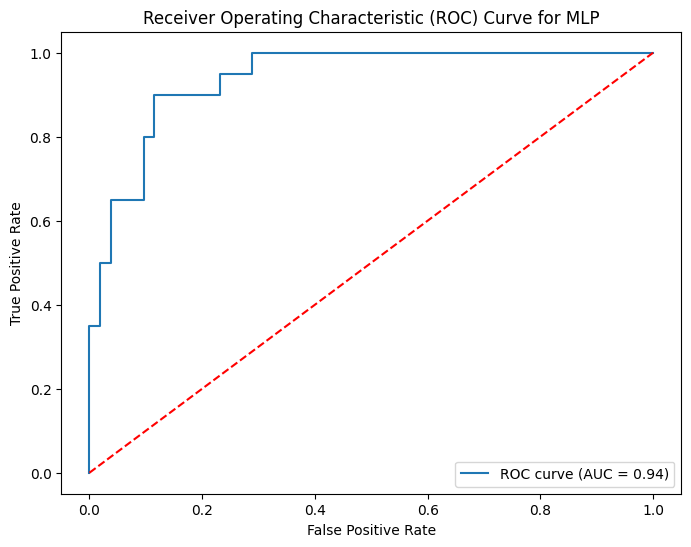

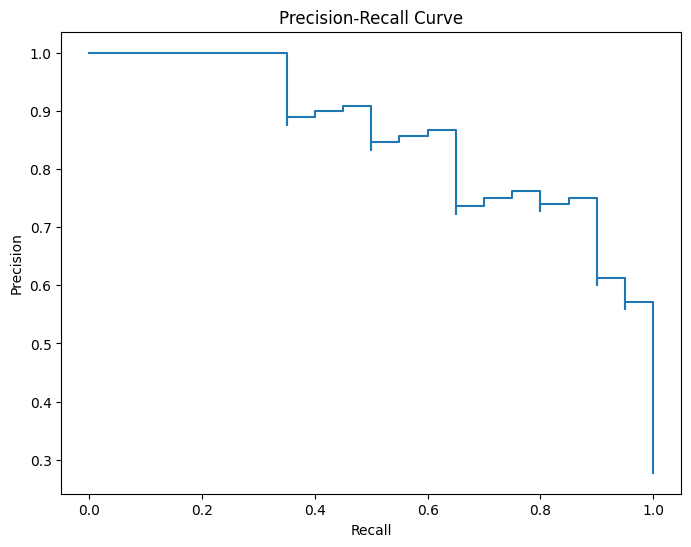

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Define the MLP model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on test set
y_test_probs = model.predict(X_test).flatten()
y_test_pred = (y_test_probs > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MLP)')
plt.show()

# Calculate ROC curve and AUC for binary classification
y_pred_probs = model.predict(X_test).flatten()
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

**SMOTE**


Accuracy : 0.9583333333333334
Precision : 0.9473684210526315
Recall : 0.9
F1-Score : 0.9230769230769231

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.95      0.90      0.92        20

    accuracy                           0.96        72
   macro avg       0.95      0.94      0.95        72
weighted avg       0.96      0.96      0.96        72



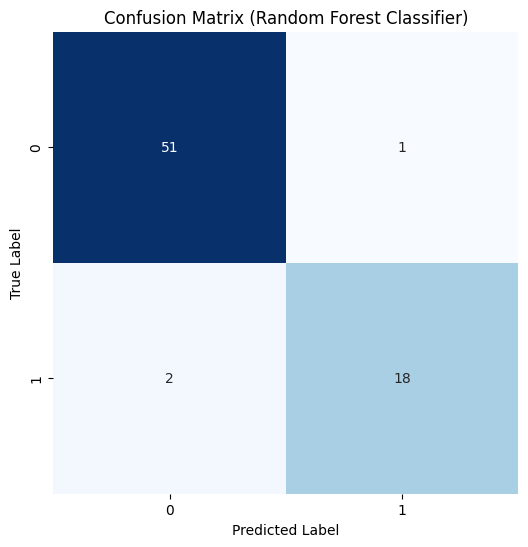

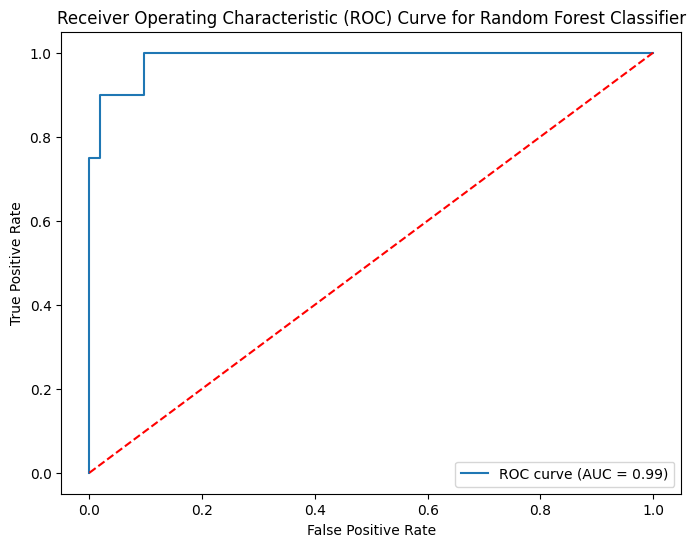

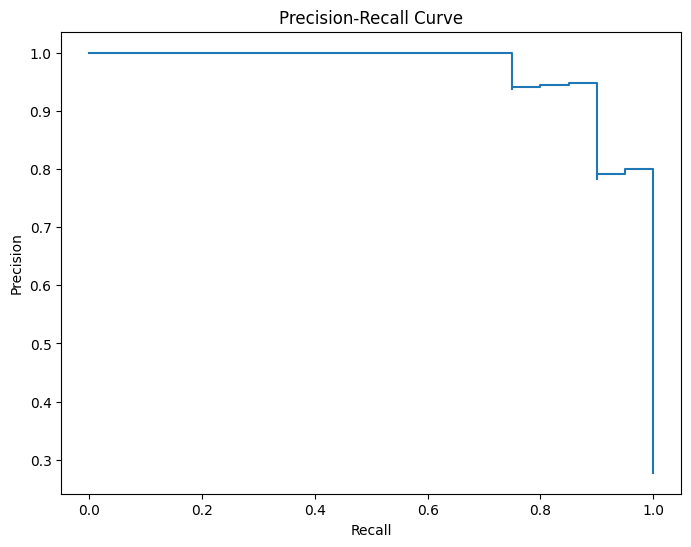

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model with the resampled data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:40:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Accuracy : 0.9444444444444444
Precision : 0.9444444444444444
Recall : 0.85
F1-Score : 0.8947368421052632

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.94      0.85      0.89        20

    accuracy                           0.94        72
   macro avg       0.94      0.92      0.93        72
weighted avg       0.94      0.94      0.94        72



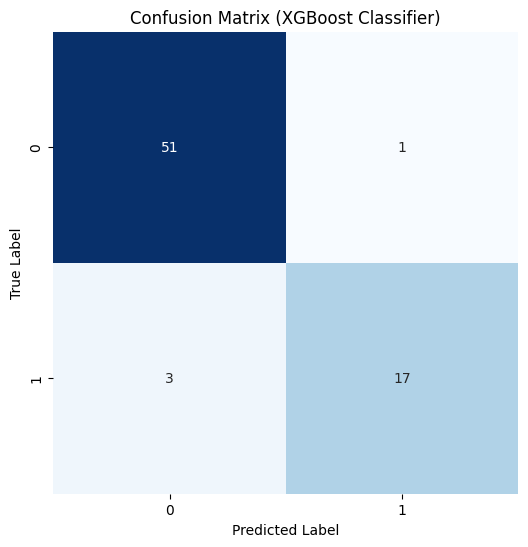

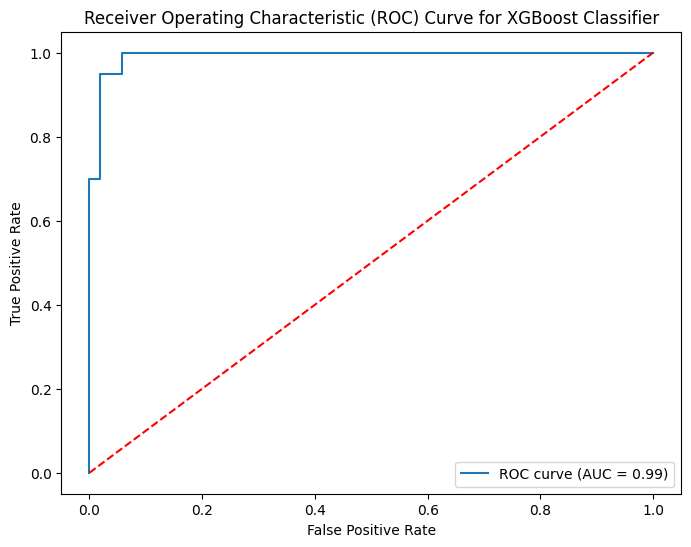

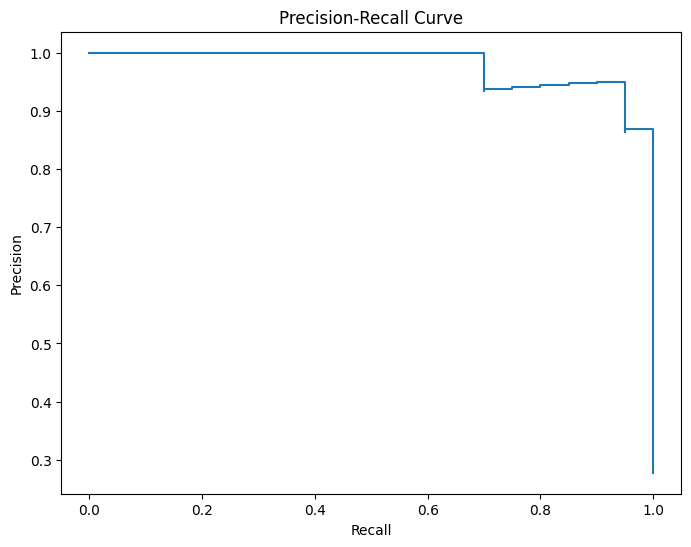

In [29]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model with the resampled data
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy : 0.6527777777777778
Precision : 0.3684210526315789
Recall : 0.35
F1-Score : 0.358974358974359

Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.77      0.76        52
           1       0.37      0.35      0.36        20

    accuracy                           0.65        72
   macro avg       0.56      0.56      0.56        72
weighted avg       0.65      0.65      0.65        72



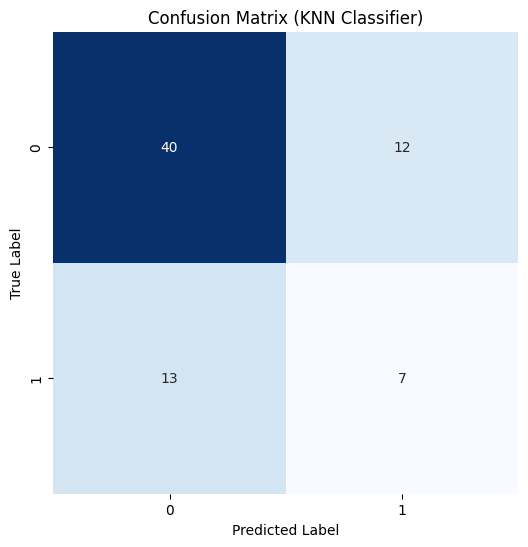

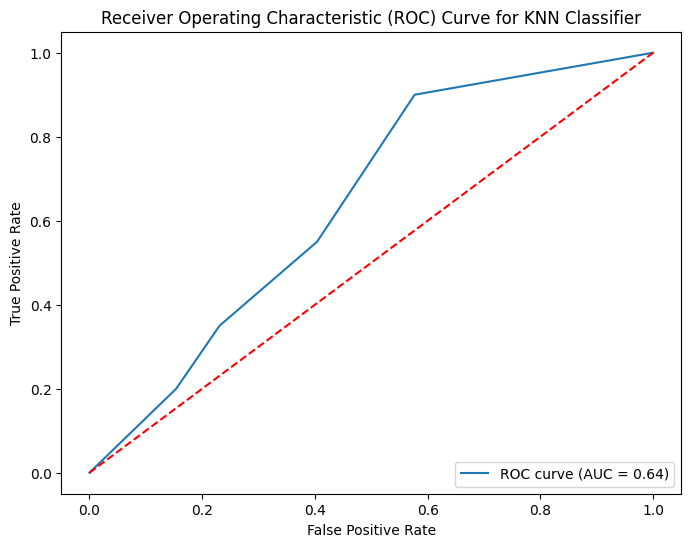

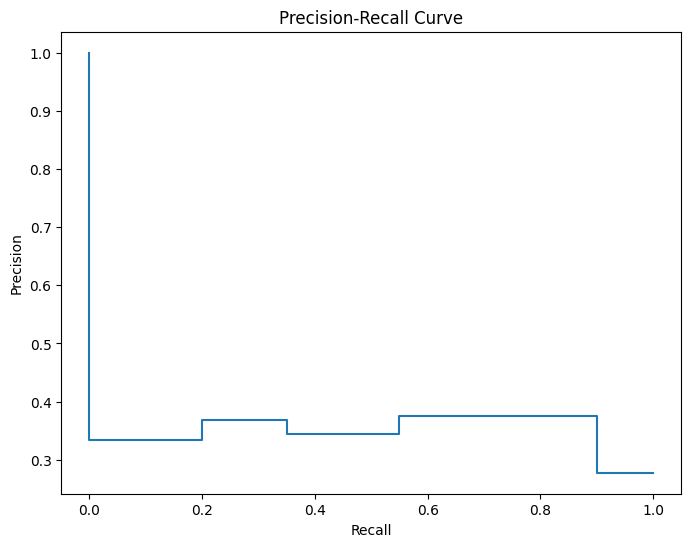

In [30]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier  # Import KNN classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors

# Train the model with the resampled data
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (KNN Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = knn_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy : 0.5833333333333334
Precision : 0.2727272727272727
Recall : 0.3
F1-Score : 0.2857142857142857

Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.69      0.71        52
           1       0.27      0.30      0.29        20

    accuracy                           0.58        72
   macro avg       0.50      0.50      0.50        72
weighted avg       0.60      0.58      0.59        72



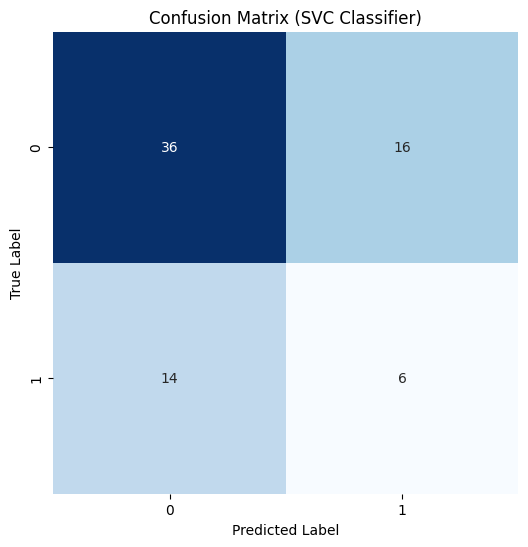

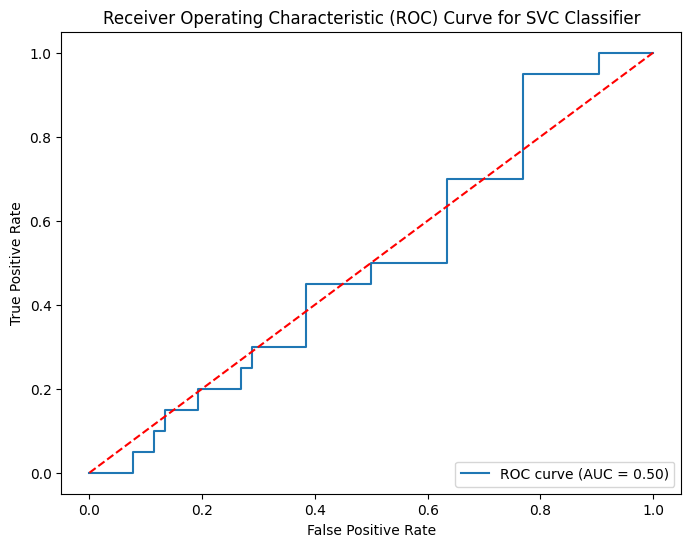

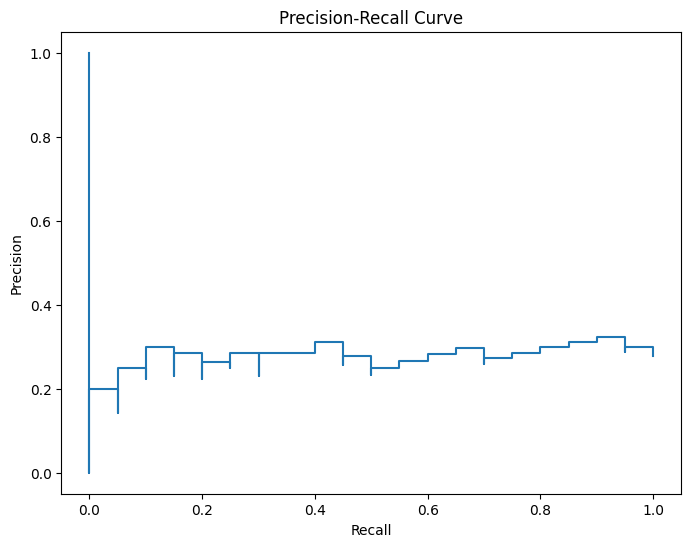

In [31]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  # Import SVC classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the SVC classifier with a radial basis function (RBF) kernel
svc_classifier = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model with the resampled data
svc_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = svc_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVC Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = svc_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Accuracy : 0.9583333333333334
Precision : 0.9473684210526315
Recall : 0.9
F1-Score : 0.9230769230769231

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.95      0.90      0.92        20

    accuracy                           0.96        72
   macro avg       0.95      0.94      0.95        72
weighted avg       0.96      0.96      0.96        72



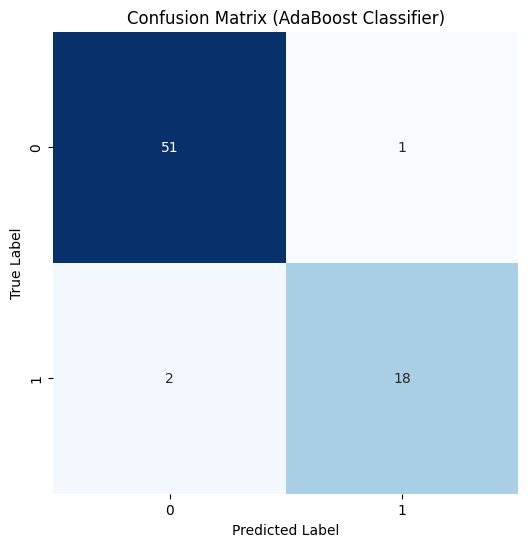

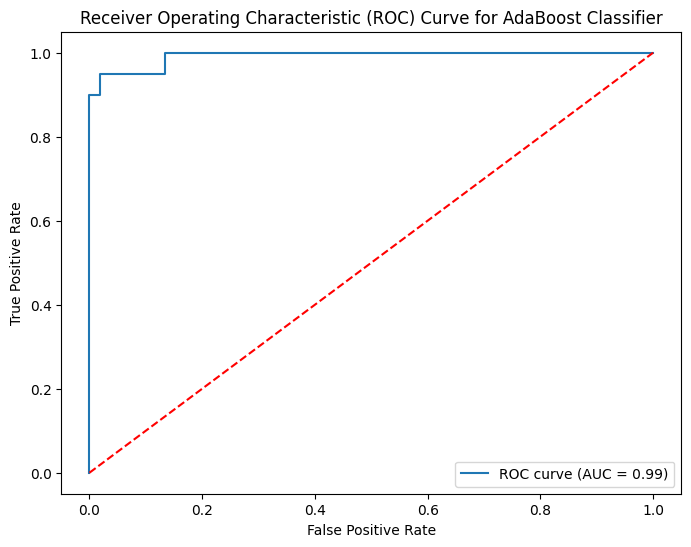

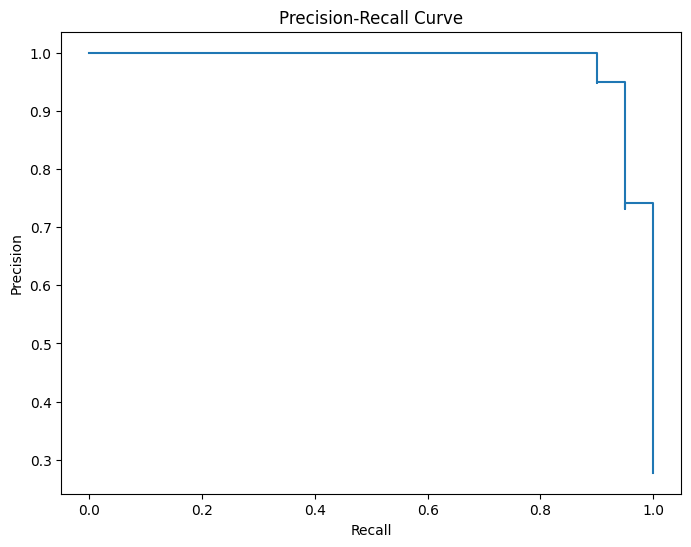

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoost classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the AdaBoost classifier with a decision tree base estimator
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the model with the resampled data
adaboost_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (AdaBoost Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = adaboost_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Stopping search: maximum iterations reached --> 20

Accuracy: 0.9722222222222222
Precision: 1.0
Recall: 0.9
F1-Score: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.90      0.95        20

    accuracy                           0.97        72
   macro avg       0.98      0.95      0.96        72
weighted avg       0.97      0.97      0.97        72



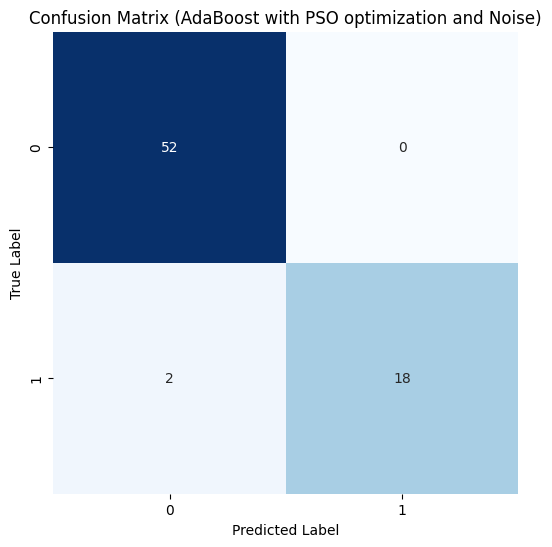

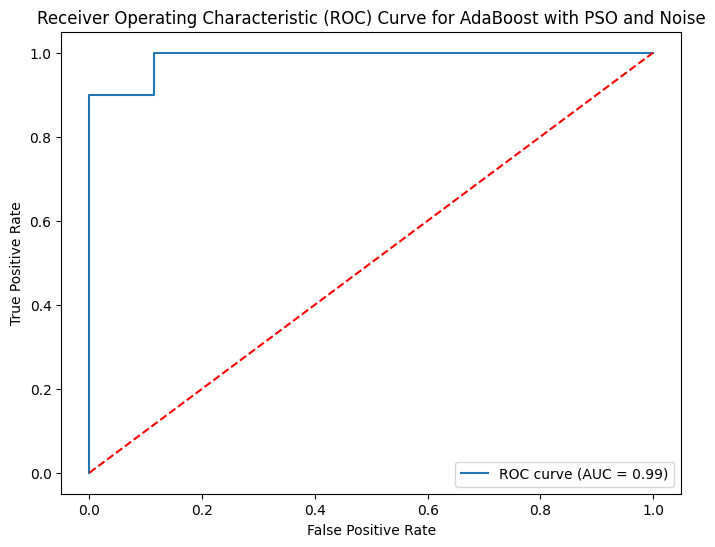

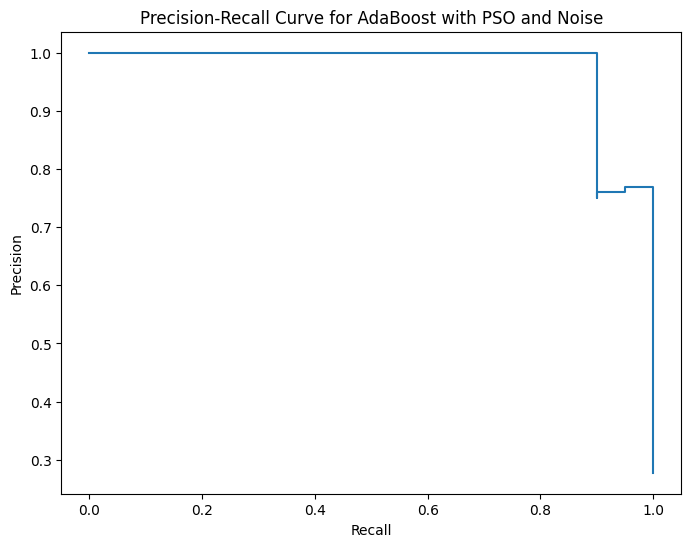

In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the objective function for PSO to minimize the negative accuracy (maximize accuracy)
def objective_function(params):
    n_estimators = int(params[0])  # Number of estimators
    learning_rate = params[1]      # Learning rate

    # Initialize the AdaBoost classifier with the given parameters
    adaboost_classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

    # Train the model on the resampled data
    adaboost_classifier.fit(X_train_resampled, y_train_resampled)

    # Evaluate on test set
    y_test_pred = adaboost_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    # Return the negative of the accuracy because PSO minimizes the objective function
    return -accuracy

# Set the bounds for the parameters (n_estimators, learning_rate)
lb = [10, 0.01]  # Lower bounds for [n_estimators, learning_rate]
ub = [200, 1.0]  # Upper bounds for [n_estimators, learning_rate]

# Run PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Extract the best parameters from the result
best_n_estimators = int(best_params[0])
best_learning_rate = best_params[1]

# Train the AdaBoost classifier with the optimized hyperparameters
adaboost_classifier = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, random_state=42)
adaboost_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (AdaBoost with PSO optimization and SMOTE)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = adaboost_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost with PSO and SMOTE')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for AdaBoost with PSO and SMOTE')
plt.show()


[LightGBM] [Info] Number of positive: 157, number of negative: 157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 314, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

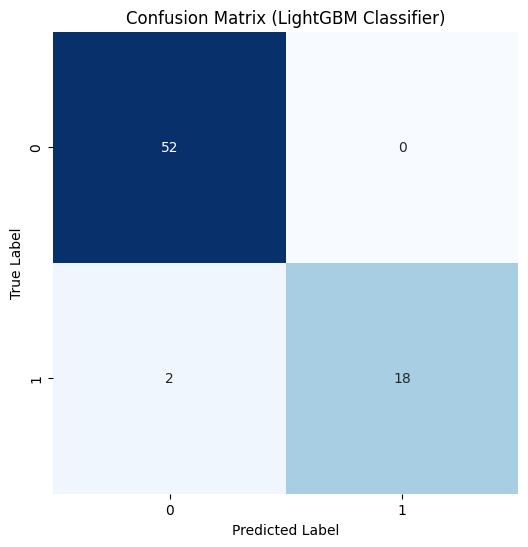

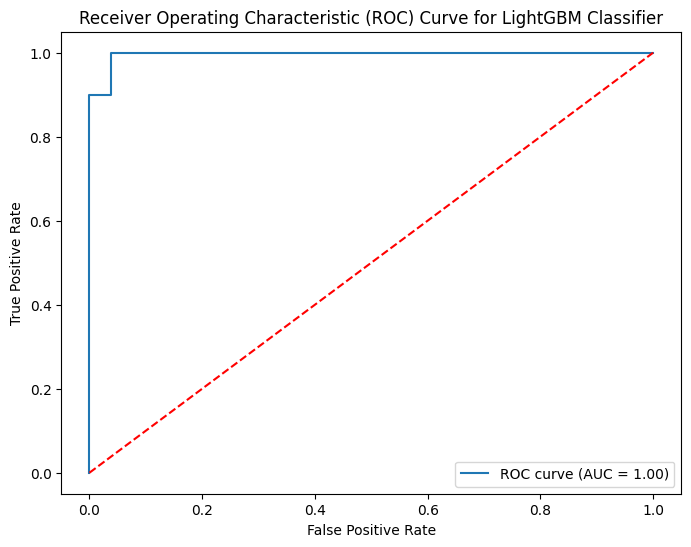

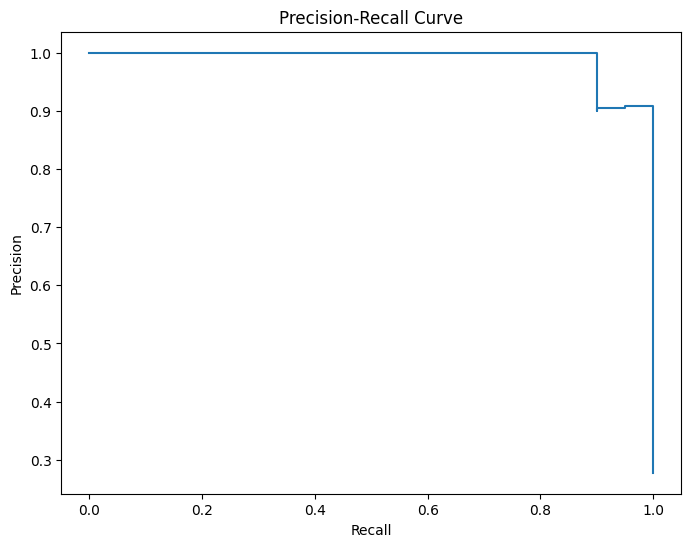

In [36]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier  # Import LightGBM classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the LightGBM classifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Train the model with the resampled data
lgbm_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_test_pred = lgbm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy :", accuracy_test)
print("Precision :", precision_test)
print("Recall :", recall_test)
print("F1-Score :", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report :\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (LightGBM Classifier)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = lgbm_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

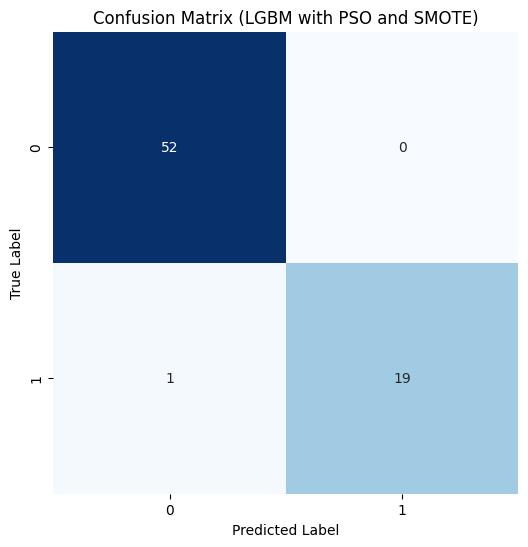

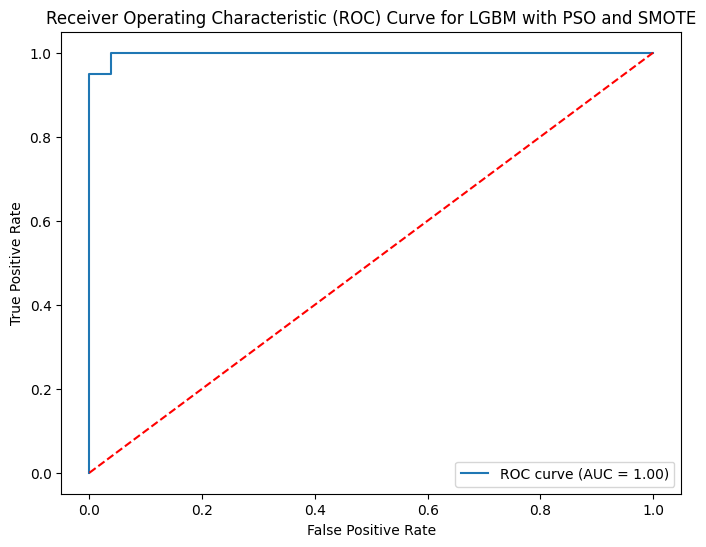

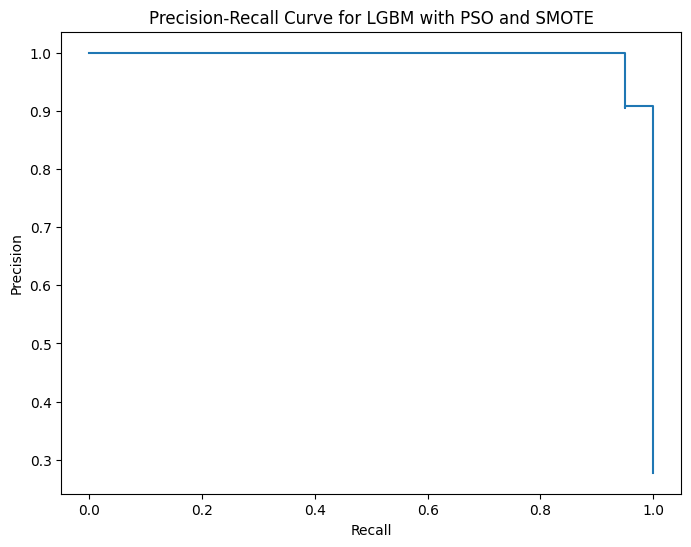

In [37]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the objective function for PSO to minimize the negative accuracy (maximize accuracy)
def objective_function(params):
    n_estimators = int(params[0])  # Number of estimators
    learning_rate = params[1]      # Learning rate
    max_depth = int(params[2])     # Maximum depth of trees

    # Initialize the LGBM classifier with the given parameters
    lgbm_classifier = LGBMClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )

    # Train the model on resampled training data
    lgbm_classifier.fit(X_train_res, y_train_res)

    # Evaluate on test set
    y_test_pred = lgbm_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    # Return the negative of the accuracy because PSO minimizes the objective function
    return -accuracy

# Set the bounds for the parameters (n_estimators, learning_rate, max_depth)
lb = [10, 0.01, 3]  # Lower bounds for [n_estimators, learning_rate, max_depth]
ub = [200, 1.0, 15]  # Upper bounds for [n_estimators, learning_rate, max_depth]

# Run PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Extract the best parameters from the result
best_n_estimators = int(best_params[0])
best_learning_rate = best_params[1]
best_max_depth = int(best_params[2])

# Train the LGBM classifier with the optimized hyperparameters
lgbm_classifier = LGBMClassifier(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth,
    random_state=42
)
lgbm_classifier.fit(X_train_res, y_train_res)

# Evaluate on test set
y_test_pred = lgbm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (LGBM with PSO and SMOTE)')
plt.show()

# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = lgbm_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LGBM with PSO and SMOTE')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LGBM with PSO and SMOTE')
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5076 - loss: 4055.9224 - val_accuracy: 0.7290 - val_loss: 1001.1809
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5057 - loss: 1283.2557 - val_accuracy: 0.2991 - val_loss: 772.5635
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5857 - loss: 367.1698 - val_accuracy: 0.7757 - val_loss: 4.2287
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5234 - loss: 146.3009 - val_accuracy: 0.3271 - val_loss: 149.9831
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5139 - loss: 65.3696 - val_accuracy: 0.7290 - val_loss: 26.0765
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5574 - loss: 52.9822 - val_accuracy: 0.3364 - val_loss: 133.9700
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4932 - loss: 157.2581 - val_accuracy: 0.3084 - val_loss: 322.4594
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5358 - loss: 116.9026 - val_a

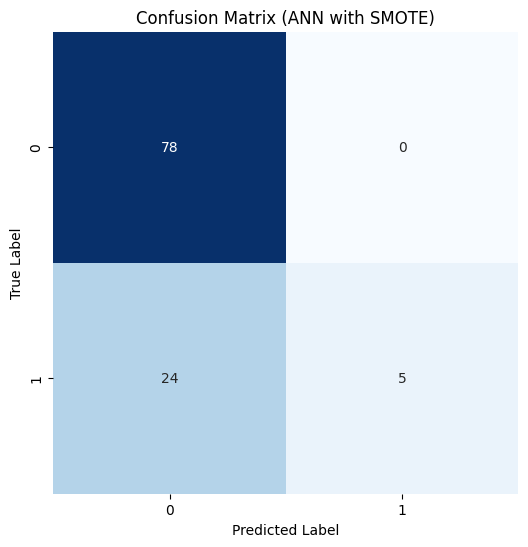

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


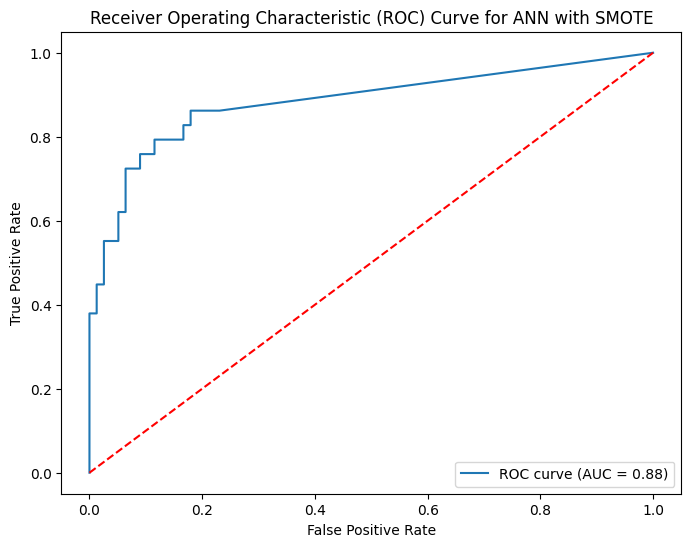

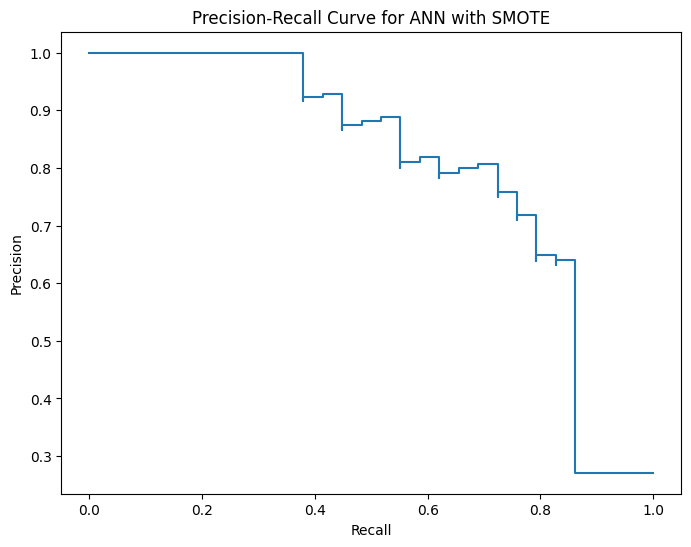

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X_train, y_train, X_test, y_test)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on test set
y_test_probs = model.predict(X_test).flatten()
y_test_pred = (y_test_probs > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (ANN with SMOTE)')
plt.show()

# Calculate ROC curve and AUC for binary classification
y_pred_probs = model.predict(X_test).flatten()
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN with SMOTE')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for ANN with SMOTE')
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4633 - loss: 1370.5610 - val_accuracy: 0.7290 - val_loss: 123.1601
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4897 - loss: 237.0909 - val_accuracy: 0.3178 - val_loss: 129.4853
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4949 - loss: 140.7347 - val_accuracy: 0.3178 - val_loss: 186.3444
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5125 - loss: 137.8539 - val_accuracy: 0.7290 - val_loss: 162.6957
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5485 - loss: 289.7370 - val_accuracy: 0.7290 - val_loss: 226.4837
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5041 - loss: 427.3037 - val_accuracy: 0.7290 - val_loss: 229.6579
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5170 - loss: 282.5615 - val_accuracy: 0.3084 - val_loss: 290.2338
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5035 - loss: 209.1467

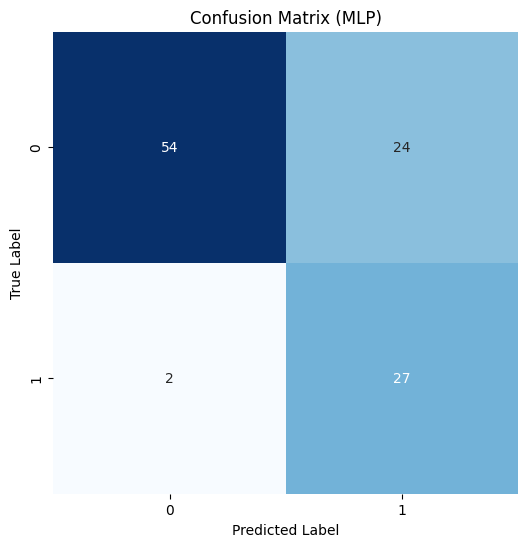

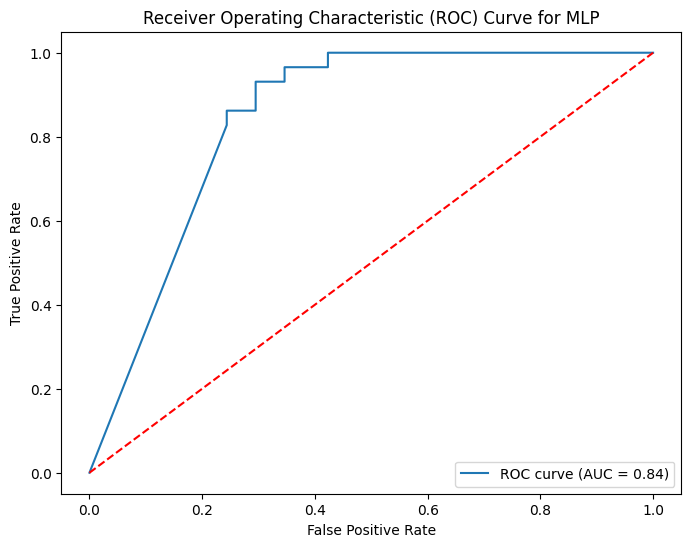

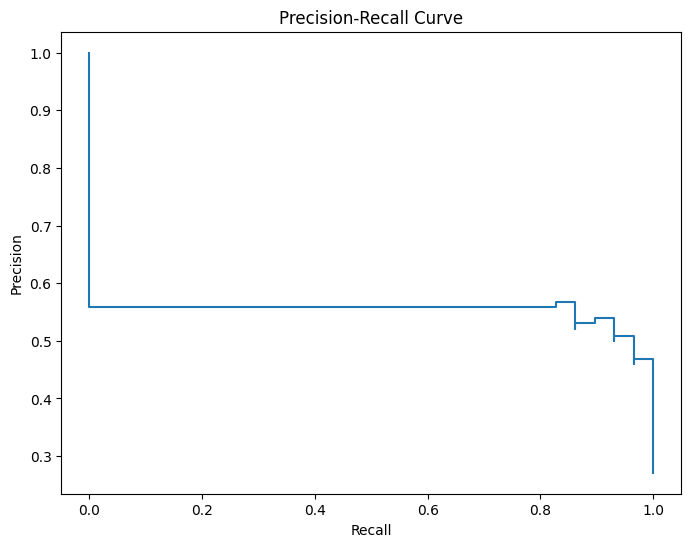

In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Assuming the data is already loaded and preprocessed (e.g., X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the MLP model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_res, y_train_res, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on test set
y_test_probs = model.predict(X_test).flatten()
y_test_pred = (y_test_probs > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nAccuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MLP)')
plt.show()

# Calculate ROC curve and AUC for binary classification
fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_test_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
